In [1]:
import numpy as np
import pandas as pd
import openpyxl
import matplotlib as mp
import matplotlib.pyplot as plt
import sklearn as sl
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RepeatedKFold
import seaborn as sns
from sklearn.metrics import classification_report
from scipy.stats import loguniform
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
AA="C:/Users/ganes/onedrive/Desktop/AI/New Zeolite/Final.xlsx"
df=pd.read_excel(AA)
df.head(5)
df=pd.read_excel(AA)
df.head(5)
df.shape



(1330, 16)

In [3]:
A=df['Ge/Si']
B=df["Al/T"]
C = df['OH/T']
D = df['H2O/T']
E = df["F/T"]
F=df['OSDA/T']
G=df["B/T"]
H = df['Na2O/T']
I = df['Cl/T']
J=df['Temperature']
K=df["time"]
L = df['AR']
M=df['Area']
N= df['C/N']
O= df['rpm']
List = [A,B,C,D,E,F,G,H,I,J,K,L,M,N,O]
List1=pd.concat(List, axis=1, sort=True)
List1.head(5)
List1.shape

(1330, 15)

In [4]:
X_OS=List1
Y_OS=df["RC2"]


train accuracy 0.9769423558897243
test accuracy 0.9285714285714286
train precision 0.9714635377982695
test precision 0.9169204419973818
train recall 0.9751239769662188
test recall 0.919637613182152
train f1 0.973252070806941
test f1 0.9171626543489142
train               precision    recall  f1-score   support

           0       0.99      0.98      0.98       824
           1       0.95      0.97      0.96       373

    accuracy                           0.97      1197
   macro avg       0.97      0.97      0.97      1197
weighted avg       0.97      0.97      0.97      1197

test               precision    recall  f1-score   support

           0       0.95      0.90      0.93        91
           1       0.81      0.90      0.85        42

    accuracy                           0.90       133
   macro avg       0.88      0.90      0.89       133
weighted avg       0.91      0.90      0.90       133

Matthews correlation coefficient 0.9465777478492023


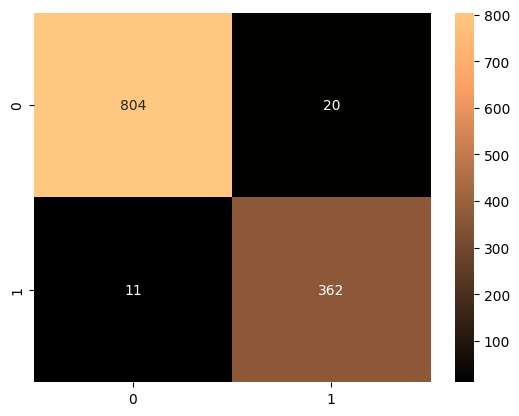

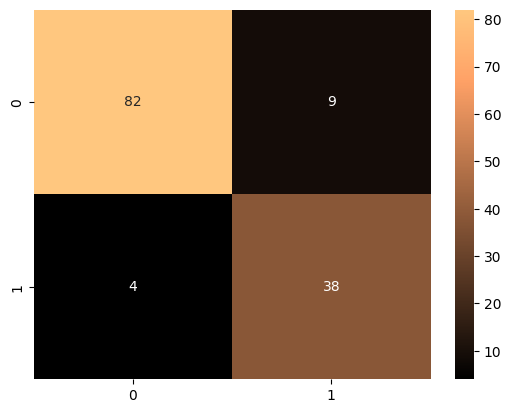

In [5]:
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_RF=list()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    RF=RandomForestClassifier(random_state=1,  n_estimators=210, min_samples_split= 6)
    rf_model=RF.fit(X_Train,Y_Train)
    predict_RFTrain=RF.predict(X_Train)
    predict_RFTest=RF.predict(X_Test)
    Acctrain = metrics.accuracy_score(Y_Train, predict_RFTrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_RFTest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_RFTrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_RFTest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_RFTrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_RFTest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_RFTrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_RFTest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_RFTrain)
    conf_matrix_Train.append(conf_matrix1)
    conf_matrix2 = confusion_matrix(Y_Test, predict_RFTest)
    conf_matrix_Test.append(conf_matrix2)
    mmc= metrics.matthews_corrcoef(Y_Train, predict_RFTrain)
    mmc_RF.append(mmc)
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_RFTrain))
print("test", metrics.classification_report(Y_Test, predict_RFTest)) 
print('Matthews correlation coefficient',mean(mmc_RF))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()


train accuracy 0.9952380952380953
test accuracy 0.9360902255639099
train precision 0.9931615642232747
test precision 0.9255362853705276
train recall 0.9958073135648868
test recall 0.9277021935293408
train f1 0.9944690089689621
test f1 0.925692848405672
train               precision    recall  f1-score   support

           0       1.00      1.00      1.00       824
           1       0.99      0.99      0.99       373

    accuracy                           0.99      1197
   macro avg       0.99      0.99      0.99      1197
weighted avg       1.00      0.99      0.99      1197

test               precision    recall  f1-score   support

           0       0.97      0.96      0.96        91
           1       0.91      0.93      0.92        42

    accuracy                           0.95       133
   macro avg       0.94      0.94      0.94       133
weighted avg       0.95      0.95      0.95       133

Matthews correlation coefficient 0.9889651334445719


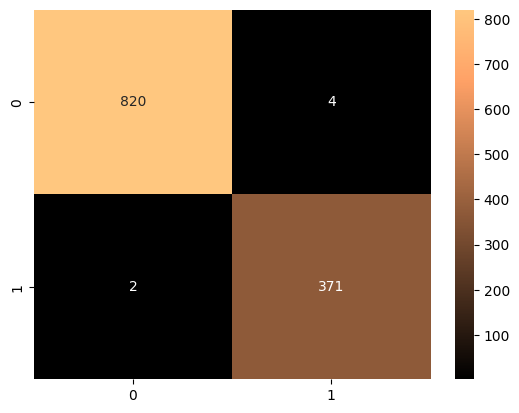

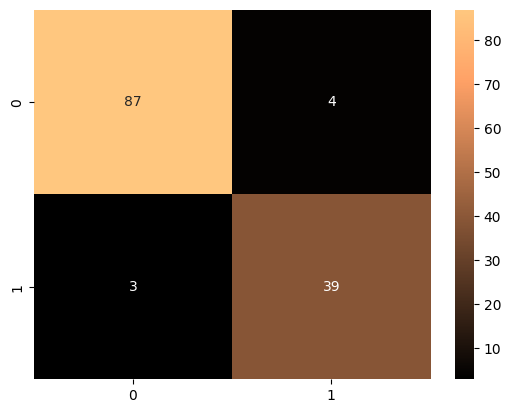

In [6]:
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_gb=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    GB = GradientBoostingClassifier(random_state=1, n_estimators=800,learning_rate=0.09, 
                                min_samples_split=2, max_depth=3, min_samples_leaf=1, 
                                min_weight_fraction_leaf=0, min_impurity_decrease=0)
    gb_model=GB.fit(X_Train, Y_Train)
    predict_gbtrain=GB.predict(X_Train)
    predict_gbtest=GB.predict(X_Test)  
    Acctrain = metrics.accuracy_score(Y_Train, predict_gbtrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_gbtest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_gbtrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_gbtest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_gbtrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_gbtest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_gbtrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_gbtest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_gbtrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_gbtest)
    mmc= metrics.matthews_corrcoef(Y_Train, predict_gbtrain)
    mmc_gb.append(mmc)
    
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_gbtrain))
print("test", metrics.classification_report(Y_Test, predict_gbtest))
print('Matthews correlation coefficient',mean(mmc_gb))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()



train accuracy 0.9951545530492899
test accuracy 0.9330827067669173
train precision 0.9924900673736863
test precision 0.9204012776781244
train recall 0.9963322866762624
test recall 0.9261923698429531
train f1 0.9943791442742128
test f1 0.9223807134150016
train               precision    recall  f1-score   support

           0       1.00      0.99      1.00       824
           1       0.98      1.00      0.99       373

    accuracy                           0.99      1197
   macro avg       0.99      1.00      0.99      1197
weighted avg       1.00      0.99      0.99      1197

test               precision    recall  f1-score   support

           0       0.97      0.93      0.95        91
           1       0.87      0.93      0.90        42

    accuracy                           0.93       133
   macro avg       0.92      0.93      0.92       133
weighted avg       0.93      0.93      0.93       133

Matthews correlation coefficient 0.9888146273423286


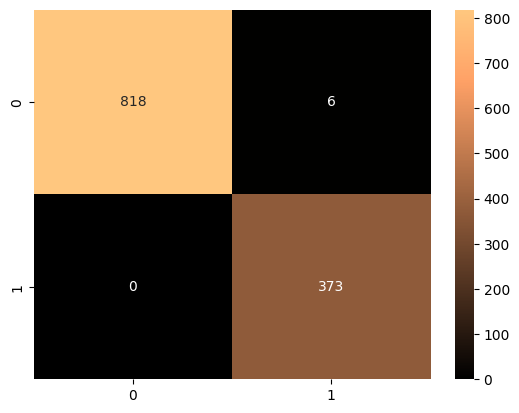

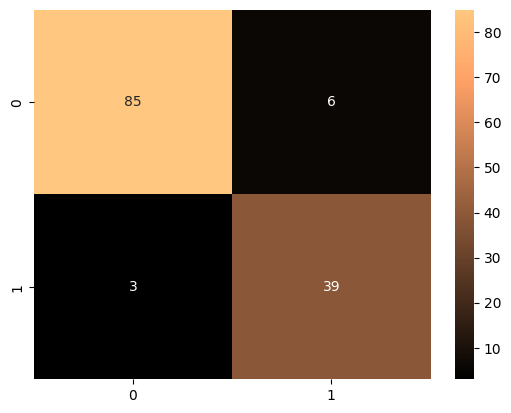

In [7]:
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_xgb=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    XGB = XGBClassifier(random_state=1, n_estimators=1970, learning_rate=0.291, 
                        alpha=0.0001,)
    xgb_model=XGB.fit(X_Train, Y_Train)
    predict_xgbtrain=XGB.predict(X_Train)
    predict_xgbtest=XGB.predict(X_Test)  
    Acctrain = metrics.accuracy_score(Y_Train, predict_xgbtrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_xgbtest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_xgbtrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_xgbtest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_xgbtrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_xgbtest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_xgbtrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_xgbtest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_xgbtrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_xgbtest)
    mmc= metrics.matthews_corrcoef(Y_Train, predict_xgbtrain)
    mmc_xgb.append(mmc)
    
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_xgbtrain))
print("test", metrics.classification_report(Y_Test, predict_xgbtest))
print('Matthews correlation coefficient',mean(mmc_xgb))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()


100%|===================| 1192/1197 [01:03<00:00]        

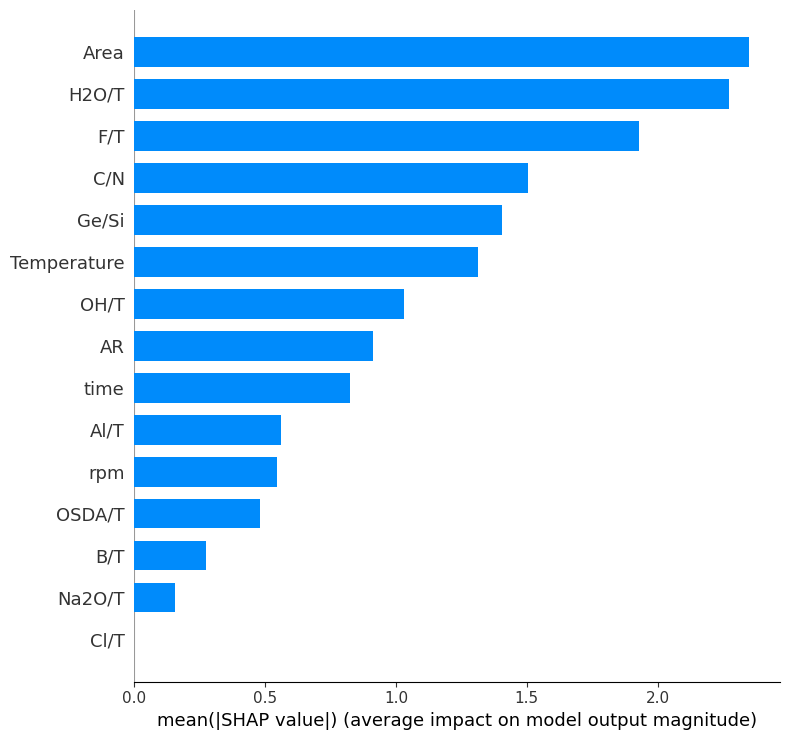

In [8]:
import shap
explainer = shap.TreeExplainer(XGB, X_Train)
shap_values_XGB = explainer.shap_values(X_Train)
shap.summary_plot(shap_values_XGB, X_Train, plot_type='bar')


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


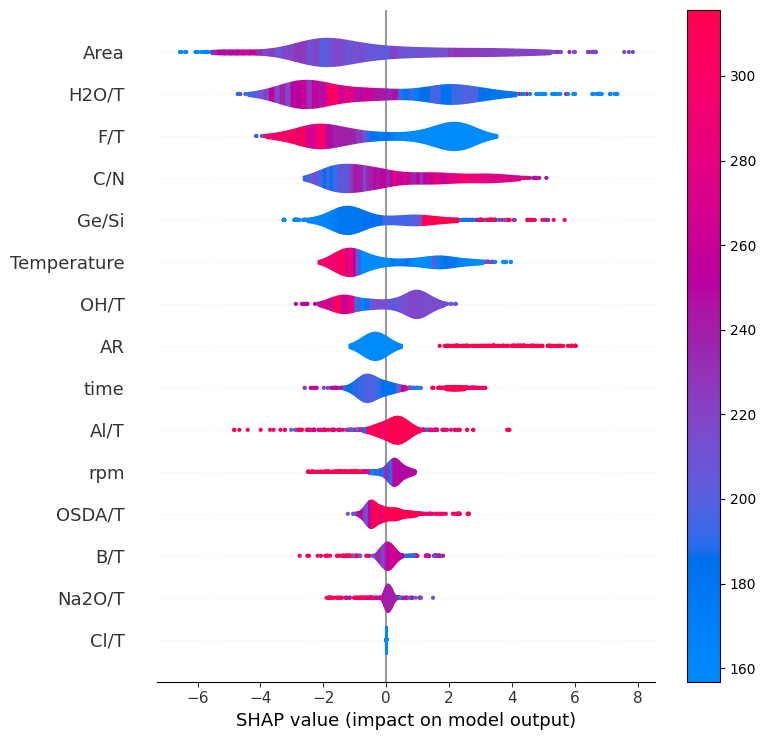

In [9]:
shap.summary_plot(shap_values_XGB, X_Train, show = False, color_bar = False, plot_type="violin")
plt.colorbar()
plt.show()

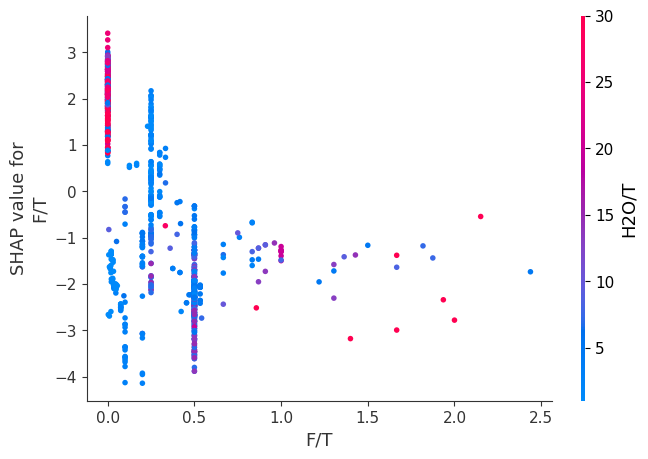

In [10]:
shap.dependence_plot("F/T", shap_values_XGB, X_Train)

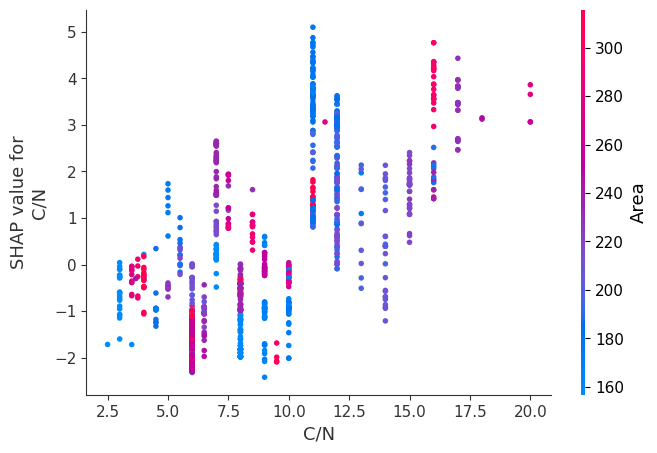

In [11]:
shap.dependence_plot("C/N", shap_values_XGB, X_Train)

train accuracy 0.9691729323308269
test accuracy 0.925563909774436
train precision 0.9624306290259226
test precision 0.9122044725237138
train recall 0.9661842142175198
test recall 0.9180466537704076
train f1 0.9642500585135052
test f1 0.9139465456827045
train               precision    recall  f1-score   support

           0       0.98      0.97      0.98       824
           1       0.94      0.95      0.95       373

    accuracy                           0.97      1197
   macro avg       0.96      0.96      0.96      1197
weighted avg       0.97      0.97      0.97      1197

test               precision    recall  f1-score   support

           0       0.94      0.90      0.92        91
           1       0.80      0.88      0.84        42

    accuracy                           0.89       133
   macro avg       0.87      0.89      0.88       133
weighted avg       0.90      0.89      0.90       133

Matthews correlation coefficient 0.9286016625082887


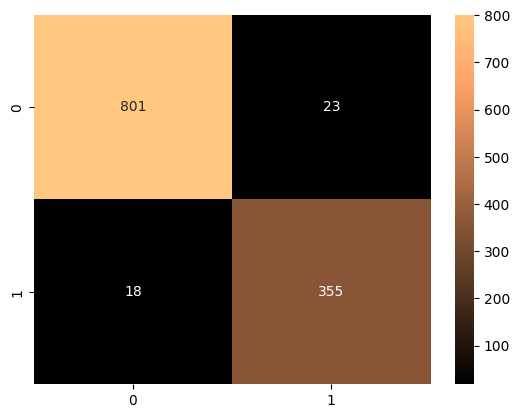

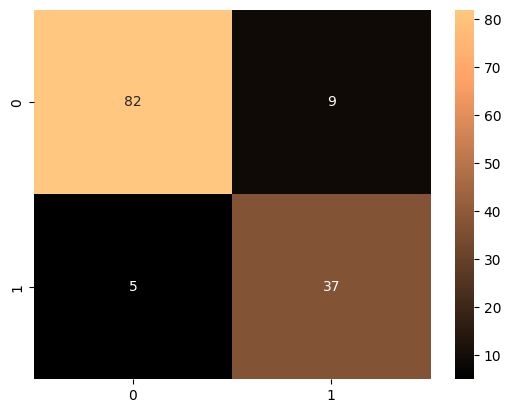

In [12]:
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_et=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    ET=ExtraTreesClassifier(random_state=1, n_estimators=500, min_samples_split=4, min_samples_leaf=2)
    ET_model=ET.fit(X_Train, Y_Train)
    predict_ettrain=ET.predict(X_Train)
    predict_ettest=ET.predict(X_Test)
    Acctrain = metrics.accuracy_score(Y_Train, predict_ettrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_ettest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_ettrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_ettest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_ettrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_ettest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_ettrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_ettest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_ettrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_ettest)
    mmc= metrics.matthews_corrcoef(Y_Train, predict_ettrain)
    mmc_et.append(mmc)
   
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_ettrain))
print("test", metrics.classification_report(Y_Test, predict_ettest)) 
print('Matthews correlation coefficient',mean(mmc_et))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()

train accuracy 0.9959064327485381
test accuracy 0.9172932330827066
train precision 0.9970431708375618
test precision 0.9042983820657822
train recall 0.9934395205803501
test recall 0.9048122079405218
train f1 0.9952145387466098
test f1 0.9037984072207074
train               precision    recall  f1-score   support

           0       0.99      1.00      1.00       824
           1       1.00      0.99      0.99       373

    accuracy                           1.00      1197
   macro avg       1.00      0.99      1.00      1197
weighted avg       1.00      1.00      1.00      1197

test               precision    recall  f1-score   support

           0       0.95      0.91      0.93        91
           1       0.83      0.90      0.86        42

    accuracy                           0.91       133
   macro avg       0.89      0.91      0.90       133
weighted avg       0.91      0.91      0.91       133

Matthews correlation coefficient 0.9904759389634579


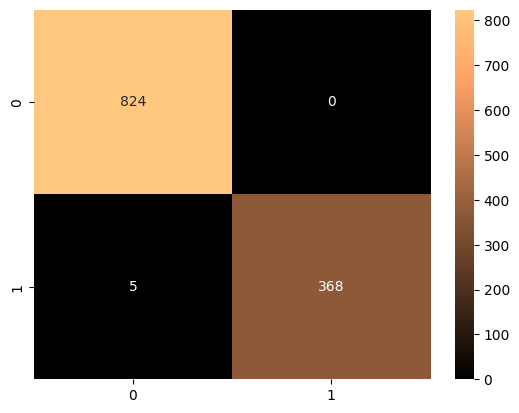

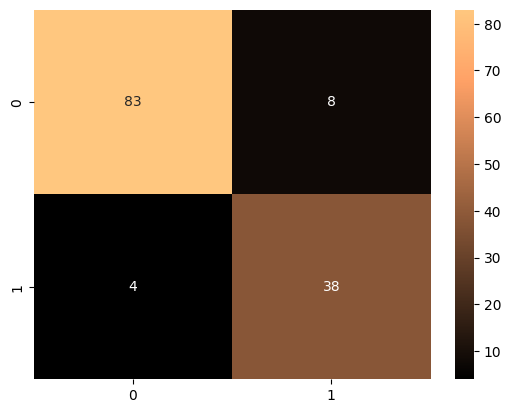

In [13]:
conf_matrix_Train =[] 
conf_matrix_Test=[] 
mmc_dt=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv =StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    DT=DecisionTreeClassifier(random_state=1)
    dt_model=DT.fit(X_Train,Y_Train)    
    predict_dttrain=DT.predict(X_Train)
    predict_dttest=DT.predict(X_Test)  
    Acctrain = metrics.accuracy_score(Y_Train, predict_dttrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_dttest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_dttrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_dttest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_dttrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_dttest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_dttrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_dttest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_dttrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_dttest)
    mmc= metrics.matthews_corrcoef(Y_Train, predict_dttrain)
    mmc_dt.append(mmc)
    
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_dttrain))
print("test", metrics.classification_report(Y_Test, predict_dttest))
print('Matthews correlation coefficient',mean(mmc_dt))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()



In [14]:
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
from io import StringIO

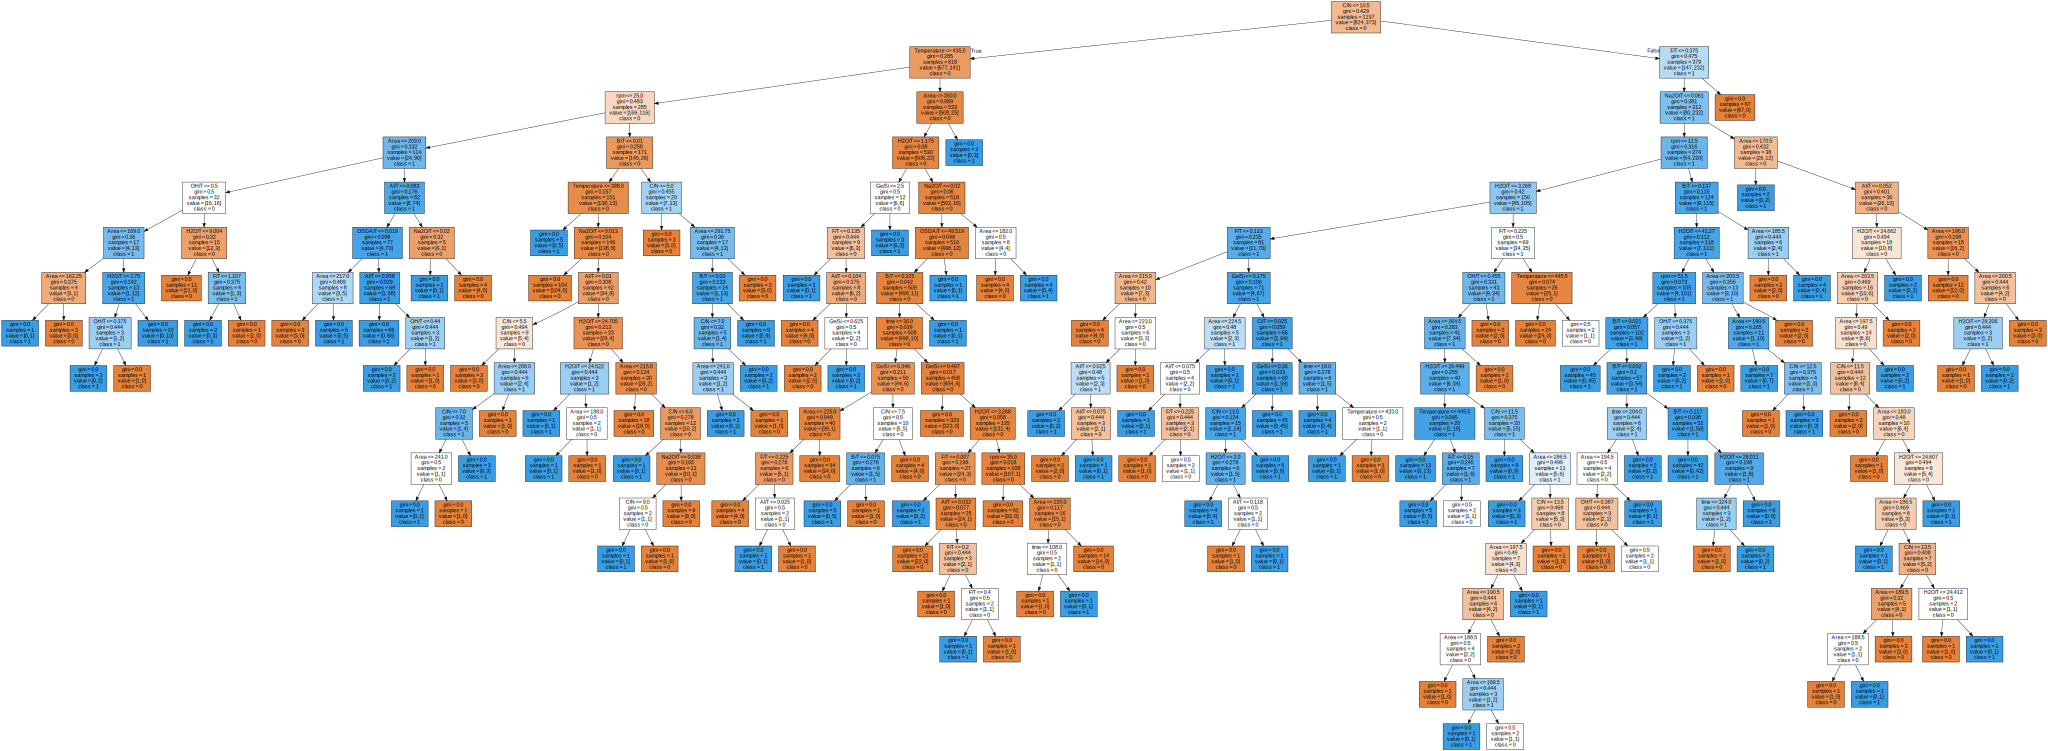

In [15]:
fn=['Ge/Si', 'Al/T', 'OH/T', 'H2O/T', 'F/T', 'OSDA/T', "B/T", "Na2O/T", "Cl/T", "Temperature", "time", "AR", "Area", "C/N", "rpm"]
cn=["0", "1"]
dot_data = tree.export_graphviz(DT,  feature_names = fn, class_names=cn,  filled = True)
graph = graphviz.Source(dot_data, format="png") 
graph 
       

In [16]:
graph.render("DTNZWOA")

'DTNZWOA.png'

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predicti

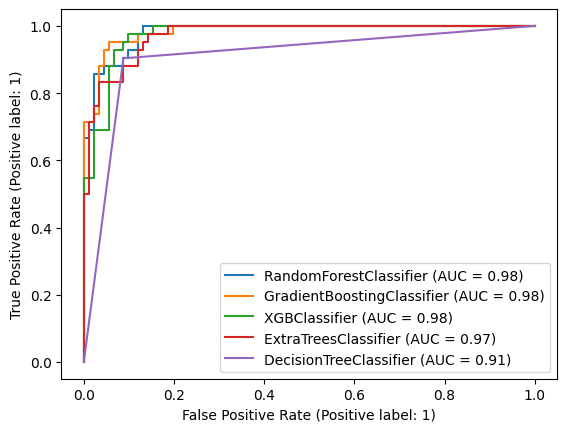

In [17]:
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve
rf_disp=plot_roc_curve(RF,X_Test,Y_Test)
ax=plt.gca()
gb_disp=plot_roc_curve(GB,X_Test,Y_Test, ax=ax)
xgb_disp=plot_roc_curve(XGB,X_Test,Y_Test, ax=ax)
et_disp=plot_roc_curve(ET,X_Test,Y_Test, ax=ax)
dt_disp=plot_roc_curve(DT,X_Test,Y_Test, ax=ax)
plt.show()


Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_est

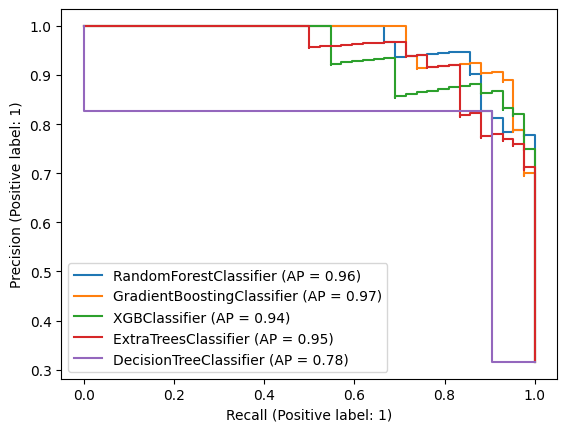

In [18]:
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve
rf_disp=plot_precision_recall_curve(RF,X_Test,Y_Test)
ax=plt.gca()
gb_disp=plot_precision_recall_curve(GB, X_Test,Y_Test, ax=ax)
xgb_disp=plot_precision_recall_curve(XGB, X_Test,Y_Test, ax=ax)
et_disp=plot_precision_recall_curve(ET, X_Test,Y_Test, ax=ax)
dt_disp=plot_precision_recall_curve(DT, X_Test,Y_Test, ax=ax)
plt.show()